<a href="https://colab.research.google.com/github/anderboni/Bootcamp-Data-Science-Aplicada/blob/main/Bootcamp_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Caderno de exploração dos dados do DataSus (2008 em diante)

Base de dados obtida em ....

https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados

https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi



In [ ]:
import pandas as pd

#importando os dados baixados do DataSus (cuidar com acentos e erro UTF-8)
#o governo brasileiro utiliza o ISO-8859-1
#cuidar também se o arquivo está separado por , ou por ;

dados = pd.read_csv("/content/A160324189_28_143_208.csv", encoding="ISO-8859-1", skiprows= 3, sep=";", skipfooter=12, thousands=".", decimal=",")

#mostra as primeiras 5 linhas
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [ ]:
#mostra as últimas linhas
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


Olhar a documentação do pandas.DataFrame para ver outras formas de mostrar os dados

In [ ]:
#média de gastos nos estados

dados.mean()

#o Python usa ponto (.) para definir a casa decimal, e no caso dos dados brasileiros com vírgula ele entende como string. 
#voltar lá pra cima e definir que, na leitura do arquivo, o separador de milhar deve ser o ponto e o de decimal a vírgula.

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [ ]:
#no momento de formatar um número de ponto flutuante (float), usar a função do seguinte modo, nesse caso com duas casas decimais. Os números passam a ser exibidos no formato americano.
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [ ]:
#obtendo os dados de apenas uma coluna (trata-se de um dicionário em python)

dados["2008/Ago"]

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

In [ ]:
#obtendo os dados de apenas uma coluna e obtendo a média dos valores dessa coluna.

dados["2008/Ago"].mean()

26636409.892222222

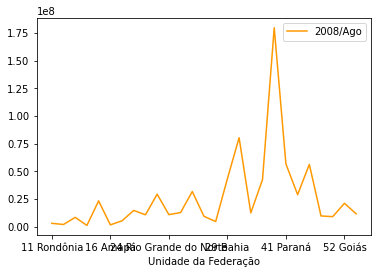

In [ ]:
#montando um gráfico

dados.plot(x="Unidade da Federação", y="2008/Ago")

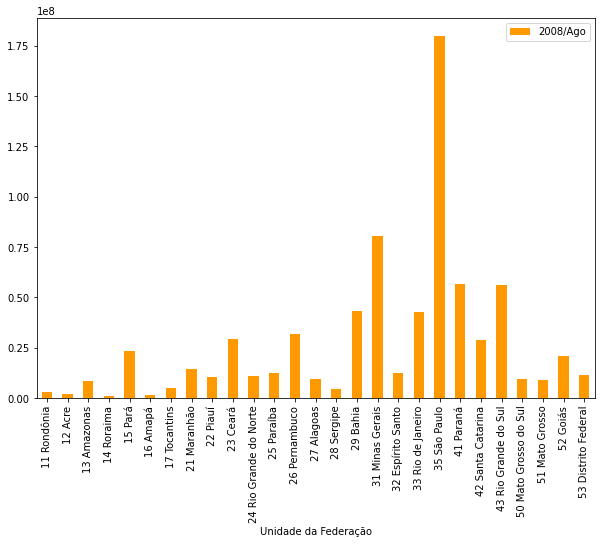

In [ ]:
#nesse caso melhor visualizado com um gráfico de barra

dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(10,7))

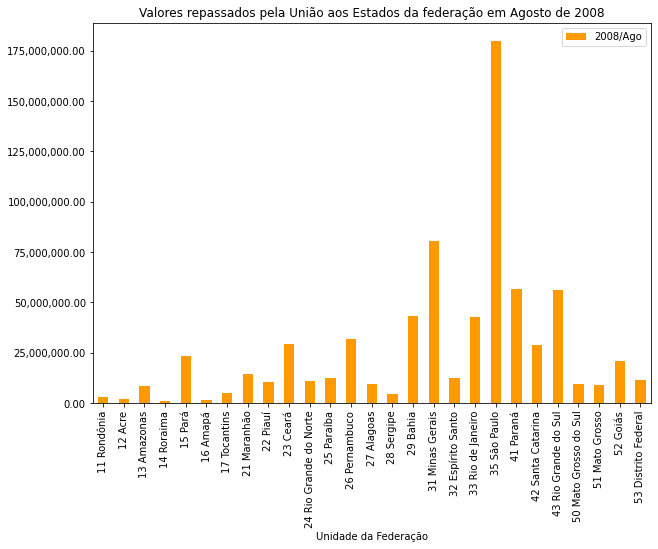

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(10,7))  #"ax" é o "axis", ou seja, o controle dos eixos.
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #procurar na documentação do matplotlib sobre o "tickformatter".

plt.title("Valores repassados pela União aos Estados da federação em Agosto de 2008")
plt.show() #mostrar o gráfico, mas na verdade nem precisa, pois já estava mostrando.

#DESAFIO_1: escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.
#DESAFIO_2: faça a mesma análise, porém para o mês mais recente.

O notebook completo dessa aula pode ser visualizado em:

https://github.com/alura-cursos/agendamento-hospitalar/blob/main/notebooks%20por%20aula/aula13/Bootcamp%20Data%20Science%20Alura%20-%20Agendamento%20Hospitalar.ipynb


In [ ]:
#antes de tudo, para resolver o desafio 2, devemos ajustando a coluna "2020/Ago", pois há um campo que deve ser desconsiderado por haver dados nulos.

import numpy as np

dados["2020/Ago"].replace("-", np.nan, inplace=True)
dados["2020/Ago"]= dados["2020/Ago"].astype("float64")

In [ ]:
#resolução do desafio 2

dados["2020/Ago"]

0      3556381.57
1             nan
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

In [ ]:
dados["2020/Ago"].mean()

19880851.11923077

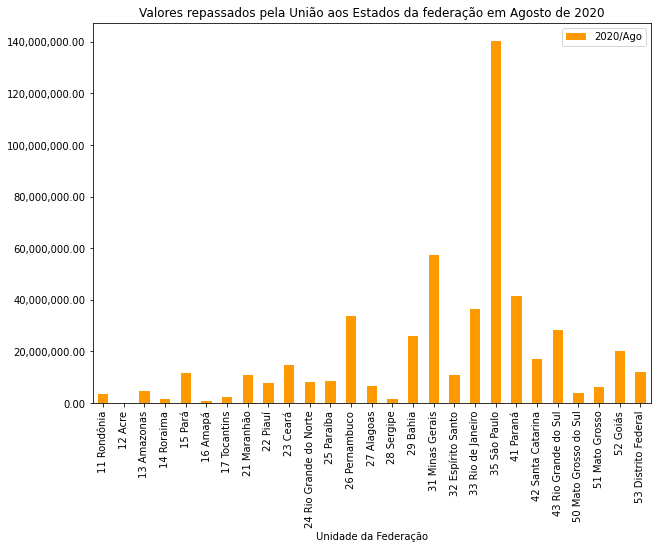

In [ ]:
#bibliotecas já foram importadas acima.

ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(10,7))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

plt.title("Valores repassados pela União aos Estados da federação em Agosto de 2020")
plt.show() 

#A partir desse ponto começa a AULA 2, sendo que acima mantivemos a mesma análise, apenas mudando a fonte dos dados.


In [ ]:
#aplicando um slice (corte dos dados, ou fatiamento) para mostrar apenas o que será analisado.

dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [ ]:
#a média ignora as colunas com valor vazio. Os meses que aparecem abaixo são os que possuem dados em todos os Estados.

dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 158, dtype: float64

In [ ]:
colunas_usaveis = dados.mean().index.tolist() #o index é uma série imutável, e por isso precisamos adicionar "tolist" para transformar numa lista de python, que é mutável.
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [ ]:
usaveis = dados[colunas_usaveis] #uma variável nova recebendo os dados, para não alterar os anteriores.
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20

In [ ]:
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [ ]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
2020/Ago            nan
Total      420668039.63
Name: 12 Acre, Length: 158, dtype: float64

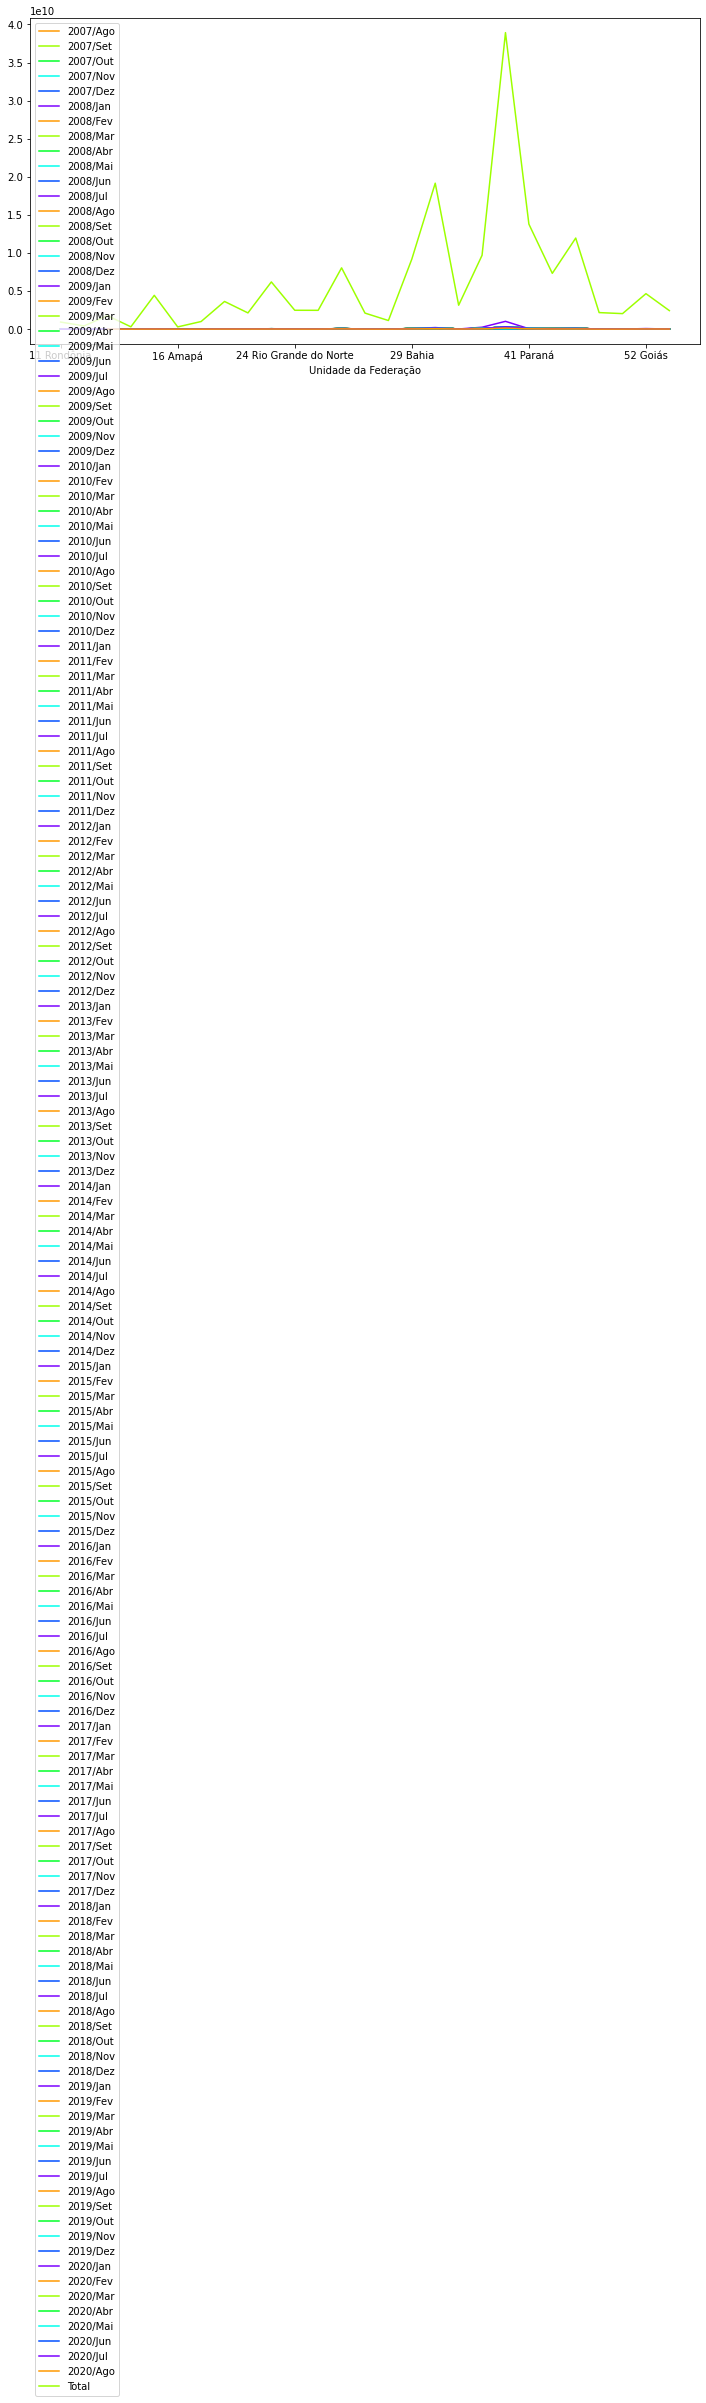

In [ ]:
usaveis.plot(figsize=(12,6)) #a visualização não fica boa

In [ ]:
usaveis.T.head() # o T foi usado para transpor a tabela, rotacionando para posteriormente montar o gráfico.

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


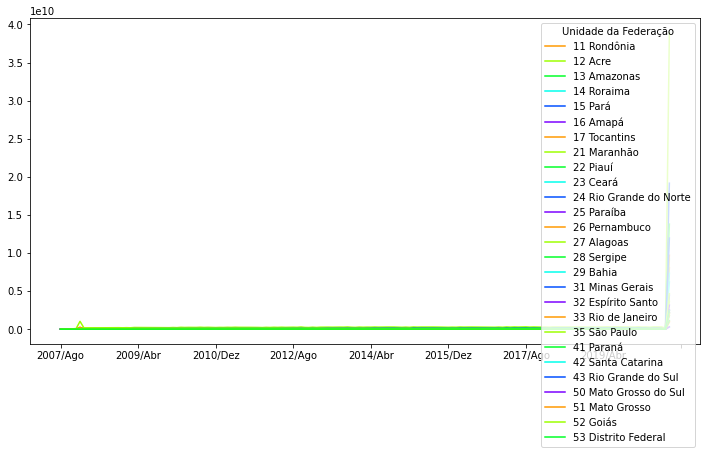

In [ ]:
usaveis.T.plot(figsize=(12,6))
#o gráfico fica assim por causa do campo TOTAL, o que inutiliza o gráfico

In [ ]:
#removendo o campo TOTAL para então plotar o gráfico

usaveis = usaveis.drop("Total", axis=1) #procurando no eixo da linha (se fosse a coluna seria "0")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,28

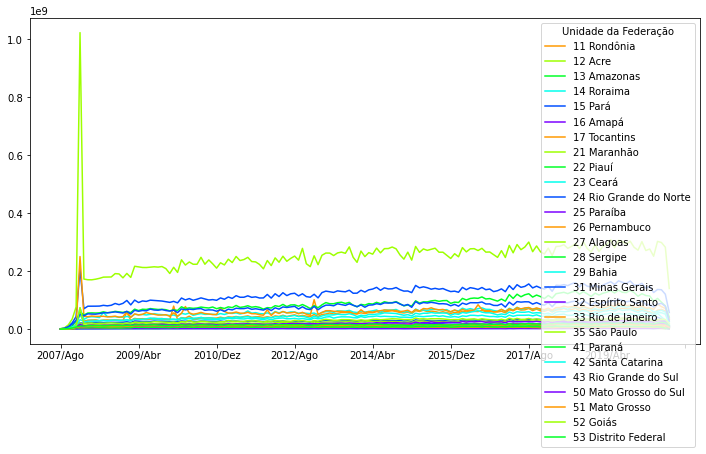

In [ ]:
usaveis.T.plot(figsize=(12,6))

#Desafio 1: reposicionar a legenda. Dentro? Fora? Onde?

#Desafio 2: escolher 5 Estados para plotar o gráfico.

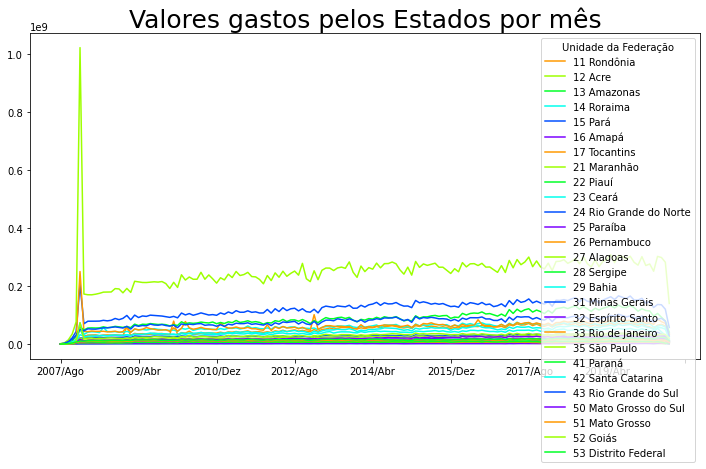

In [ ]:
#Resposta para o DESAFIO 1

usaveis.T.plot(figsize=(12,6))

plt.title("Valores gastos pelos Estados por mês", fontsize=25)
plt.show() 

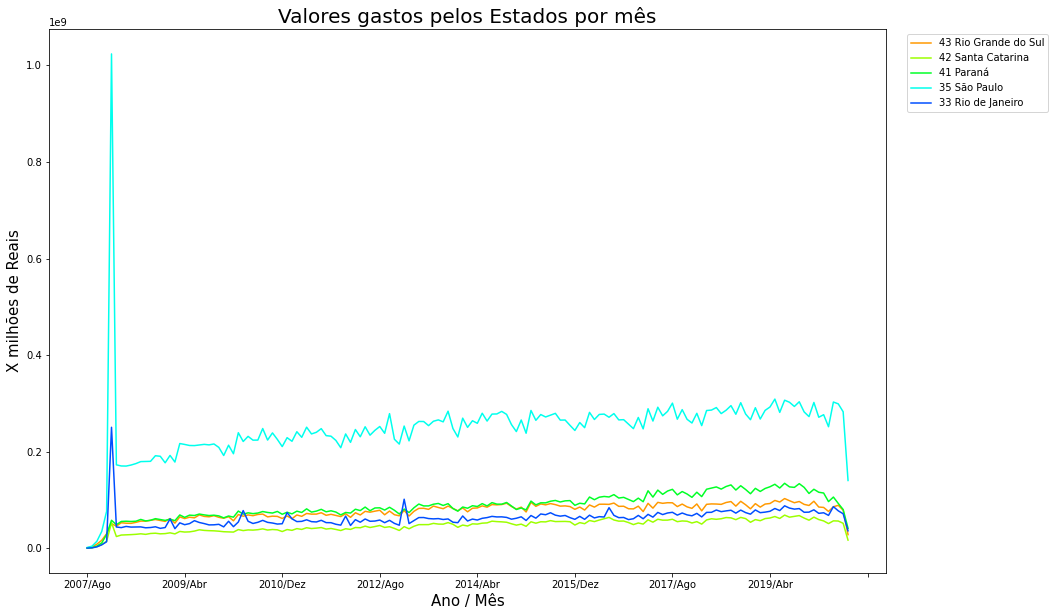

In [ ]:
#Resposta para o Desafio 2

estados = usaveis.loc[["43 Rio Grande do Sul", "42 Santa Catarina", "41 Paraná", "35 São Paulo", "33 Rio de Janeiro"]]
estados.T.plot(figsize=(15,10))
plt.title("Valores gastos pelos Estados por mês", fontsize=20)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)
plt.show()

#Nesse ponto começa a AULA 3, resolvendo abaixo o desafio proposto logo no início do vídeo 

- Mudar palete de cores com o matplotlib.

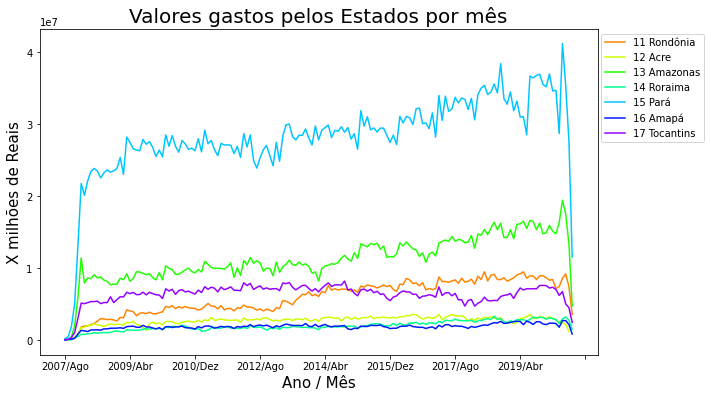

In [ ]:
#Resposta para o desafio acima

import seaborn as sns

sns.set_palette(sns.color_palette("gist_rainbow", 7))

usaveis[:7].T.plot(figsize=(10,6)) #primeiros 7 Estados

plt.title("Valores gastos pelos Estados por mês", fontsize=20)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)
plt.show()

##Iniciando de fato a AULA 3

In [ ]:
usaveis.T.columns[1:4] #Selecionando do segundo ao terceiro elemento
#o usáveis tem nas linhas os estados e nas colunas os meses. Utilizando o "T" ocorre a transposição. Trata-se da mesma coisa que pedir o índice.

Index(['12 Acre', '13 Amazonas', '14 Roraima'], dtype='object', name='Unidade da Federação')

In [ ]:
usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
usaveis.T.columns[:5] #selecionando os 5 primeiros estados (o zero como início é opcional)

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
usaveis[:5] #pedindo as primeiras linhas.

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,28

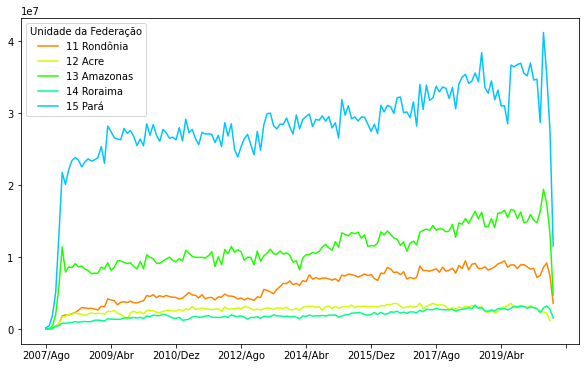

In [ ]:
usaveis[:5].T.plot(figsize=(10,6)) #plotando os 5 primeiros Estados

In [ ]:
#selecionando Estados aleatórios
usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,10824255.26
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,60195929.05,58296066.50,58362424.47,60181080.42,55168339.49,56655278.59,56069454.96,52426527.16,55200330.53,50094672.65,58796191.84,61160709.55,60093810.34,61237932.18,63709506.55,63061083.41,59354217.40,63961626.64,61553236.70,53908557.78,59452473.88,57176215.74,61547622.60,62756764.33,65813210.22,61817516.05,68759673.19,64503540.72,66075691.36,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76,16991236.43
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,74063828.22,18149374.27,20992213.03,21049477.30,19162546.79,20332533.92,20008563.15,21041071.33,21396098.51,20610541.50,19912347.49,19343787.54,20817880.6

In [ ]:
#selecionando Estados aleatórios, mas definindo a "semente" para poder reproduzir os dados em outras situações
import numpy as np
np.random.seed(687942)

usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,10824255.26
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45,8080160.97
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

##Desafio: adicionar uma coluna mostrando a região de cada Estado.

###Dica: usaveis.sum(axis=1) sendo o axis para mudar o eixo.
Utilizar "usaveis["Total"] = usaveis.sum(axis=1)"

In [ ]:
regiao =  {'1':'Norte',
           '2':'Nordeste',
           '3':'Sudeste',
           '4':'Sul',
           '5':'Centro-Oeste'}
function = lambda x: regiao[x.name[0]]
usaveis['Região'] = usaveis.apply(function, axis=1)

In [ ]:
usaveis["Total"] = usaveis.sum(axis=1) #incluindo novamente a coluna TOTAL
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,Norte,929129055.39
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,Norte,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,Norte,1771652039.82
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2682746.28,2891100.20,2737677.78,2693726.29,267145

In [ ]:
#os 5 Estados que mais gastaram

ordenado_total = usaveis.sort_values("Total", ascending=False)
ordenado_total = ordenado_total.drop("Total", axis=1) #desconsiderando a coluna TOTAL
ordenado_total = ordenado_total.drop("Região", axis=1) #desconsiderando a coluna REGIÃO
ordenado_total.head(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03

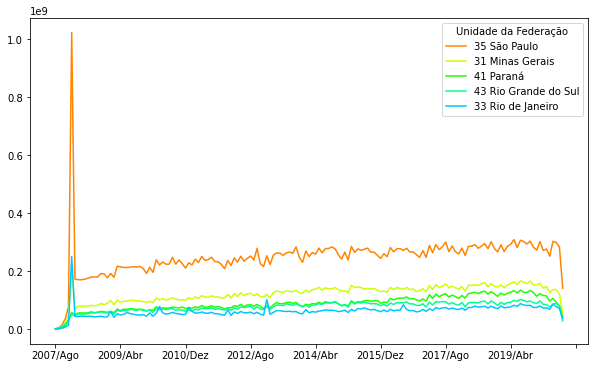

In [ ]:
#montando o gráfico dos 5 mais

ordenado_total.head(5).T.plot(figsize=(10,6)) #o gráfico só é plotado se houve valores numéricos apenas. Por isso as colunas TOTAL e REGIÃO foram retiradas acima.

#Desafio: deixar o gráfico mais bonito.

#Desafio: adicione seu estado aos 5 estados existentes (ou outro, caso seu Estado já esteja na lista). Ou seja, comparar o seu Estado com os demais.

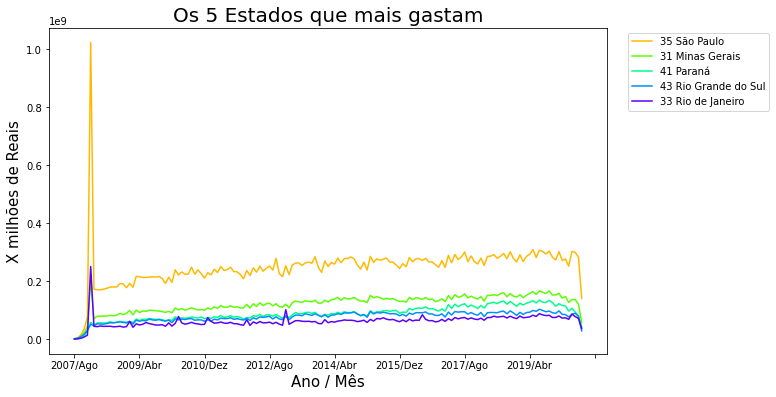

In [ ]:
#Resposta para o desafio acima (deixando o gráfico mais bonito)

import seaborn as sns

sns.set_palette(sns.color_palette("gist_rainbow", 5))

ordenado_total[:5].T.plot(figsize=(10,6)) #alternativa: ordenado_total.head(5).T.plot(figsize=(10,6))

plt.title("Os 5 Estados que mais gastam", fontsize=20)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(bbox_to_anchor = (1.30, 1), frameon=True)
plt.show()

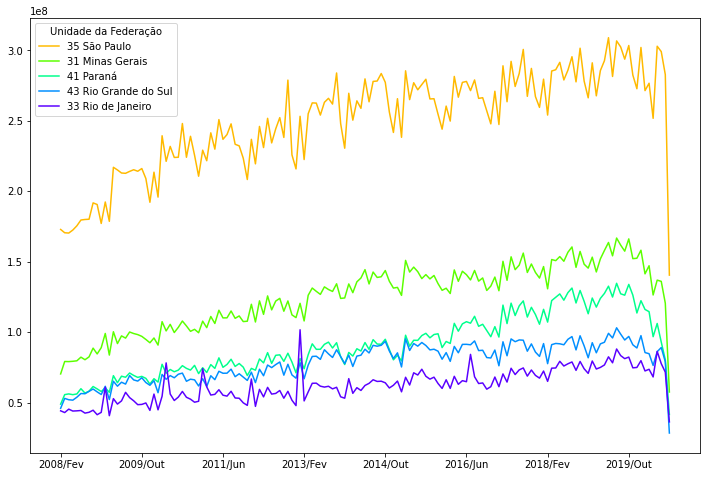

In [ ]:
#Considerando os dados apenas da 6ª coluna para frente, a fim de cortar o pico no início do gráfico

colunas_interessadas = ordenado_total.columns[6:]
ordenado_total = ordenado_total[colunas_interessadas]

ordenado_total.head(5).T.plot(figsize=(12,8))

In [ ]:
#Resposta para o desafio acima (adicionando mais um Estado)

comparativo = ordenado_total.head(5).index.to_list()
comparativo.append("26 Pernambuco")
comparativo

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '26 Pernambuco']

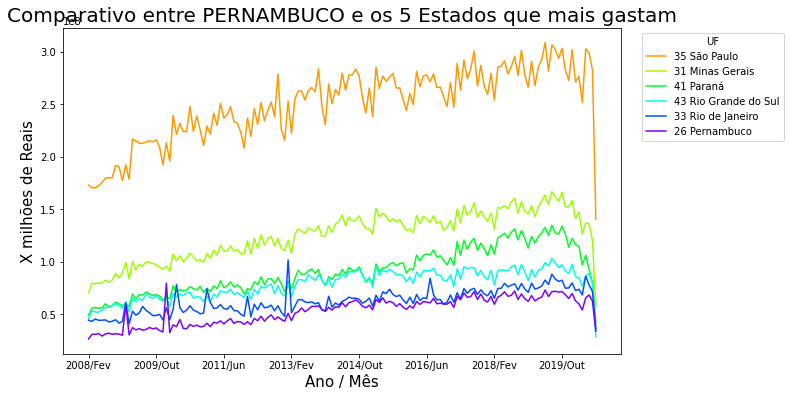

In [ ]:
#gráfico com o Estado "Pernambuco" adicionado acima

sns.set_palette(sns.color_palette("gist_rainbow", 6))

ordenado_total.loc[comparativo].T.plot(figsize=(10,6))

plt.title("Comparativo entre PERNAMBUCO e os 5 Estados que mais gastam", fontsize=20)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.30, 1), frameon=True)
plt.show()

##Desafio: googlar os casos de dengue no Brasil e verificar se reflete nos gastos.

##Desafio: plotar o gráfico somente com os Estados da região sudeste e ver se afetou com um pico em 2012/2013 de forma similar nesses estados.

##Desafio: adicionar seu Estado (ou outro) novamente.

##Desafio: deixar o gráfico mais informativo.

##Deixaremos a análise da DENGUE para depois e faremos agora  o desafio de plotar o gráfico somente da região SUDESTE e, posteriormente, incluindo também outro estado.

In [ ]:
#incluindo novamente a coluna REGIÃO.

regiao =  {'1':'Norte',
           '2':'Nordeste',
           '3':'Sudeste',
           '4':'Sul',
           '5':'Centro-Oeste'}
function = lambda x: regiao[x.name[0]]
usaveis['Região'] = usaveis.apply(function, axis=1)

In [ ]:
#incluindo novamente a coluna TOTAL.

usaveis["Total"] = usaveis.sum(axis=1) #incluindo novamente a coluna TOTAL
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,Norte,1858258110.78
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,Norte,841333511.62
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,Norte,3543304079.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2682746.28,2891100.20,2737677.78,2693726.29,26714

In [ ]:
#selecionando a Região SUDESTE

sudeste = usaveis.loc[usaveis['Região'] == 'Sudeste']

#retirando a REGIÃO e TOTAL para plotar em seguida o gráfico
sudeste = sudeste.drop(['Região'], axis=1)
sudeste = sudeste.drop(['Total'], axis=1)

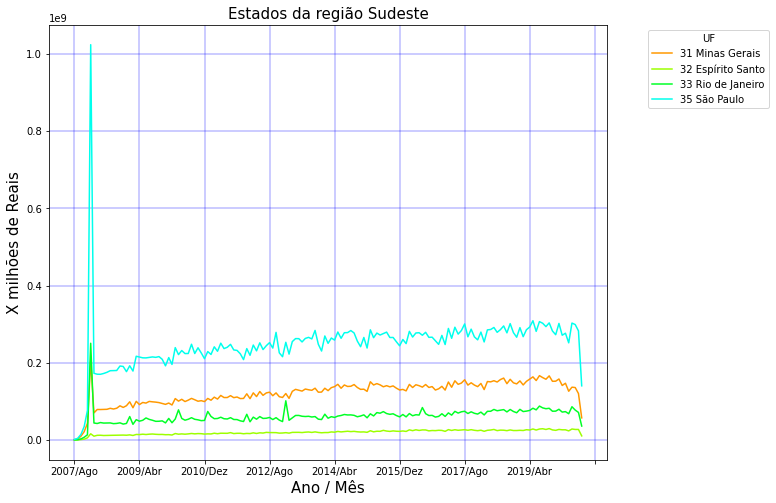

In [ ]:
#Plotando o gráfico da região SUDESTE

sns.set_palette(sns.color_palette("gist_rainbow", 6))

sudeste.T.plot(figsize=(10,8))

plt.title("Estados da região Sudeste", fontsize=15)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.30, 1), frameon=True)
plt.grid(color='b', linestyle='-', linewidth=0.4)
plt.show()

Analisando o gráfico acima, notamos que o comportamento do Rio de Janeiro em fevereiro de 2013 (pico) não foi acompanhado pelos demais Estados da região Sudeste.

In [ ]:
#Adicionado outro Estado novamente e plotando o gráfico SUDESTE + PERNAMBUCO

comparativo_2 = sudeste.index.to_list()
comparativo_2.append("26 Pernambuco")
comparativo_2

['31 Minas Gerais',
 '32 Espírito Santo',
 '33 Rio de Janeiro',
 '35 São Paulo',
 '26 Pernambuco']

In [ ]:
#colocando os dados selecionados numa variável e tirando as colunas REGIÃO e TOTAL

sudeste_pernambuco = usaveis.loc[comparativo_2]

sudeste_pernambuco = sudeste_pernambuco.drop(['Região'], axis=1)
sudeste_pernambuco = sudeste_pernambuco.drop(['Total'], axis=1) #será que não dá pra fazer isso na mesma linha?

sudeste_pernambuco

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,10824255.26
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36264322.65
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685

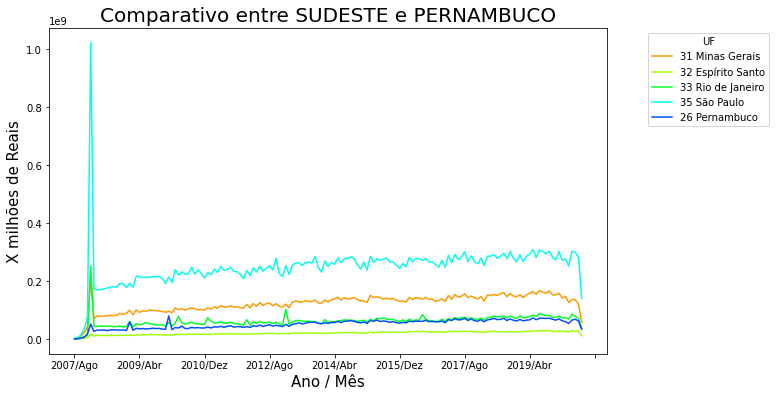

In [ ]:
#Plotando o gráfico de SUDESTE + PERNAMBUCO 

sns.set_palette(sns.color_palette("gist_rainbow", 6))

sudeste_pernambuco.T.plot(figsize=(10,6))

plt.title("Comparativo entre SUDESTE e PERNAMBUCO", fontsize=20)
plt.xlabel("Ano / Mês", fontsize=15)
plt.ylabel("X milhões de Reais", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.30, 1), frameon=True)
plt.show()

##DESAFIO DA DENGUE:

Para esse desafio buscamos os dados no TABNET, conforme campos selecionados do print abaixo.

Para comparação utilizaremos as informações de todos os procedimentos realizados apenas nos anos 2019 e 2020, considerando UF, Ano/Mês e Valor total gasto.

Lembrando o desafio: buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

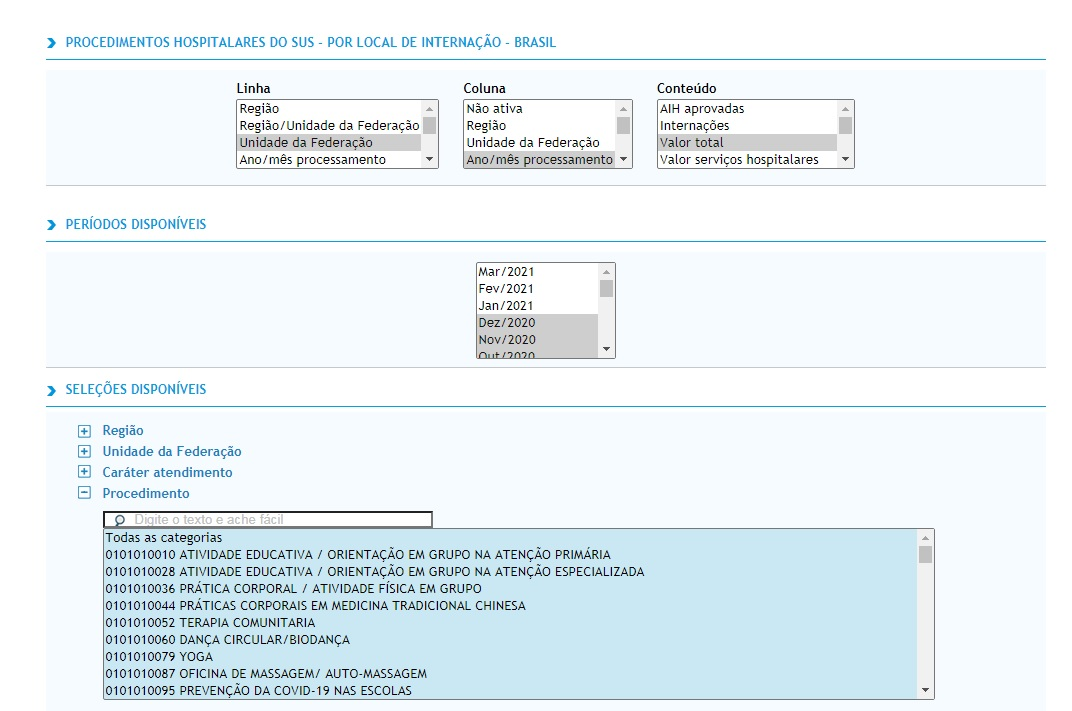

In [ ]:
#Desafio da DENGUE. Importando imagem.

from IPython.display import Image
filename = "/content/tabnet.jpg"
Image(filename = filename, width=1000, height=900)

In [ ]:
#importando os dados e ajustando o formato

dados_dengue = pd.read_csv("/content/A102444189_28_143_208.csv", encoding="ISO-8859-1", skiprows= 4, sep=";", skipfooter=12, thousands=".", decimal=",")

pd.options.display.float_format = "{:.2f}".format

colunas_dengue = dados_dengue.mean().index.tolist()
colunas_dengue.insert(0,'Unidade da Federação')

usaveis_dengue = dados_dengue[colunas_dengue]

usaveis_dengue = usaveis_dengue.set_index('Unidade da Federação')

usaveis_dengue = usaveis_dengue.replace("-", np.nan).astype("float")

usaveis_dengue.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2019/Jan,2019/Fev,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Out,2019/Dez,2020/Jan,2020/Mar,2020/Abr,2020/Mai,2020/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,8393.64,6788.43,10316.46,9969.01,32479.55,16153.93,8017.42,17717.14,28416.83,34899.54,19422.63,9102.91,10620.72,312709.84
12 Acre,12641.03,10787.83,16354.11,7270.85,6005.50,6376.32,5273.46,26757.58,21790.82,10571.13,11312.51,8372.68,1712.81,224004.62
13 Amazonas,1924.05,1726.56,2523.00,1638.68,4078.88,2014.25,2135.73,13873.25,16529.24,15005.81,8832.56,5147.50,7010.77,145759.05
14 Roraima,668.26,1235.55,4898.67,726.04,896.69,1086.99,5987.91,11582.33,16358.58,6659.06,1633.15,287.76,550.05,80460.41
15 Pará,25698.98,38919.08,41564.76,59702.15,28144.35,20101.74,19733.37,10163.67,30454.34,52312.96,32160.17,14866.71,5148.69,577452.17


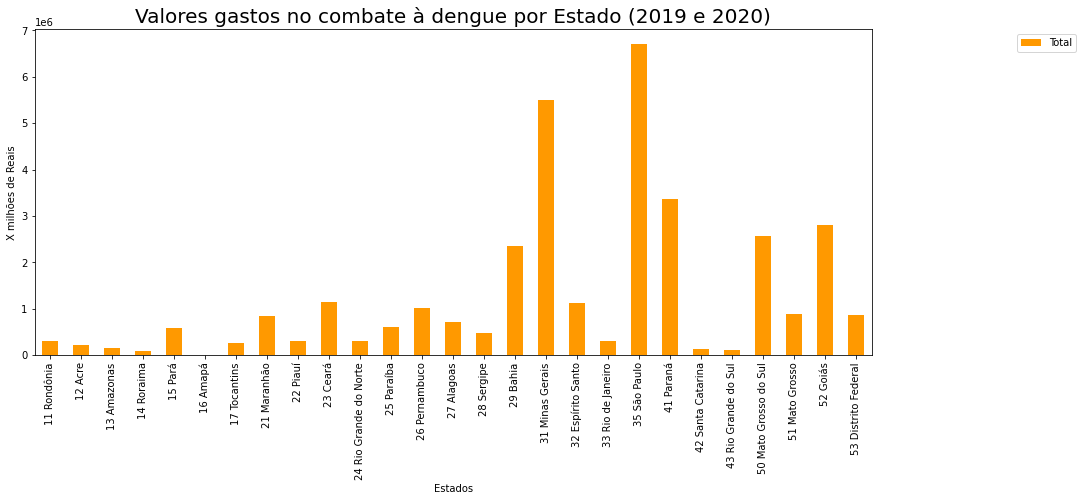

In [ ]:
dados_dengue.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(15,6))

plt.title("Valores gastos no combate à dengue por Estado (2019 e 2020)", fontsize=20)
plt.xlabel("Estados", fontsize=10)
plt.ylabel("X milhões de Reais", fontsize=10)
plt.legend(bbox_to_anchor = (1.25, 1), frameon=True)
plt.show()

##Conforme vemos no gráfico, e na relação abaixo, os Estados que mais gastaram são:

São Paulo;
Minas Gerais;
Paraná;
Goiás;
Mato Grosso do Sul;

##Ainda não reaizamos o comparativo com os dados analisados no exercício anterior

In [ ]:
#os 5 Estados que mais gastaram
dados_dengue.head(5).sort_values("Total", ascending=False)

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
4,15 Pará,25698.98,38919.08,41564.76,53180.08,59702.15,28144.35,20101.74,32544.16,16650.56,19733.37,20430.81,10163.67,30454.34,45490.85,52312.96,32160.17,14866.71,5148.69,10681.33,5412.31,3849.57,2119.09,2949.60,5172.84,577452.17
0,11 Rondônia,8393.64,6788.43,10316.46,8655.70,9969.01,32479.55,16153.93,9646.03,8142.14,8017.42,9546.53,17717.14,28416.83,34404.56,34899.54,19422.63,9102.91,10620.72,8769.82,3314.38,4490.35,3393.81,3022.18,7026.13,312709.84
1,12 Acre,12641.03,10787.83,16354.11,2390.08,7270.85,6005.50,6376.32,2783.38,3775.97,5273.46,15112.99,26757.58,21790.82,28349.74,10571.13,11312.51,8372.68,1712.81,3075.87,-,2449.29,1800.07,5992.51,13048.09,224004.62
2,13 Amazonas,1924.05,1726.56,2523.00,3723.16,1638.68,4078.88,2014.25,950.23,295.76,2135.73,3951.70,13873.25,16529.24,17295.44,15005.81,8832.56,5147.50,7010.77,4952.06,6543.99,3474.87,4218.98,6734.44,11178.14,145759.05
3,14 Roraima,668.26,1235.55,4898.67,2923.65,726.04,896.69,1086.99,1926.07,1704.05,5987.91,12931.41,11582.33,16358.58,7578.64,6659.06,1633.15,287.76,550.05,-,825.55,-,-,-,-,80460.41


In [ ]:
usaveis_dengue = dados_dengue.drop("Total", axis=1) #desconsiderando a coluna TOTAL
usaveis_dengue.head(5)

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
0,11 Rondônia,8393.64,6788.43,10316.46,8655.70,9969.01,32479.55,16153.93,9646.03,8142.14,8017.42,9546.53,17717.14,28416.83,34404.56,34899.54,19422.63,9102.91,10620.72,8769.82,3314.38,4490.35,3393.81,3022.18,7026.13
1,12 Acre,12641.03,10787.83,16354.11,2390.08,7270.85,6005.50,6376.32,2783.38,3775.97,5273.46,15112.99,26757.58,21790.82,28349.74,10571.13,11312.51,8372.68,1712.81,3075.87,-,2449.29,1800.07,5992.51,13048.09
2,13 Amazonas,1924.05,1726.56,2523.00,3723.16,1638.68,4078.88,2014.25,950.23,295.76,2135.73,3951.70,13873.25,16529.24,17295.44,15005.81,8832.56,5147.50,7010.77,4952.06,6543.99,3474.87,4218.98,6734.44,11178.14
3,14 Roraima,668.26,1235.55,4898.67,2923.65,726.04,896.69,1086.99,1926.07,1704.05,5987.91,12931.41,11582.33,16358.58,7578.64,6659.06,1633.15,287.76,550.05,-,825.55,-,-,-,-
4,15 Pará,25698.98,38919.08,41564.76,53180.08,59702.15,28144.35,20101.74,32544.16,16650.56,19733.37,20430.81,10163.67,30454.34,45490.85,52312.96,32160.17,14866.71,5148.69,10681.33,5412.31,3849.57,2119.09,2949.60,5172.84


In [ ]:
usaveis_dengue.mean()

2019/Jan    26020.74
2019/Fev    43029.20
2019/Mar    67914.35
2019/Mai   157454.82
2019/Jun   127588.23
2019/Jul    79714.18
2019/Out    24159.89
2019/Dez    20833.45
2020/Jan    45433.72
2020/Mar    97665.53
2020/Abr    79280.63
2020/Mai    68336.86
2020/Jun    44146.65
dtype: float64

In [ ]:
transposta = usaveis_dengue[0:27].T
transposta.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2019/Jan,8393.64,12641.03,1924.05,668.26,25698.98,1001.94,22169.10,17801.60,6008.71,12193.53,6460.65,9830.27,22221.25,3559.19,1223.81,25507.95,111092.32,44871.37,12830.22,121204.08,4766.91,2652.03,1228.99,31530.03,13613.57,177575.66,3890.84
2019/Fev,6788.43,10787.83,1726.56,1235.55,38919.08,287.76,36890.55,35885.28,9560.45,18495.13,5069.24,9429.65,32806.45,10462.80,340.03,42690.00,222785.35,41679.27,11597.56,342036.69,14530.11,3816.33,592.93,41427.88,21109.06,189334.14,11504.19
2019/Mar,10316.46,16354.11,2523.00,4898.67,41564.76,622.22,31439.19,56984.83,8977.17,27928.21,4048.74,24949.40,44112.36,18679.64,3081.31,48889.83,429094.49,61606.12,17022.72,563208.44,37466.61,8811.44,2118.32,69227.79,19211.96,234515.88,46033.86
2019/Abr,8655.70,2390.08,3723.16,2923.65,53180.08,-,37560.06,110161.88,26771.09,50997.77,15596.24,41226.67,85558.37,22683.97,5654.81,89658.80,821057.92,83705.46,40789.35,876361.98,86846.35,5453.69,2186.22,203644.45,25316.67,319602.25,51794.52


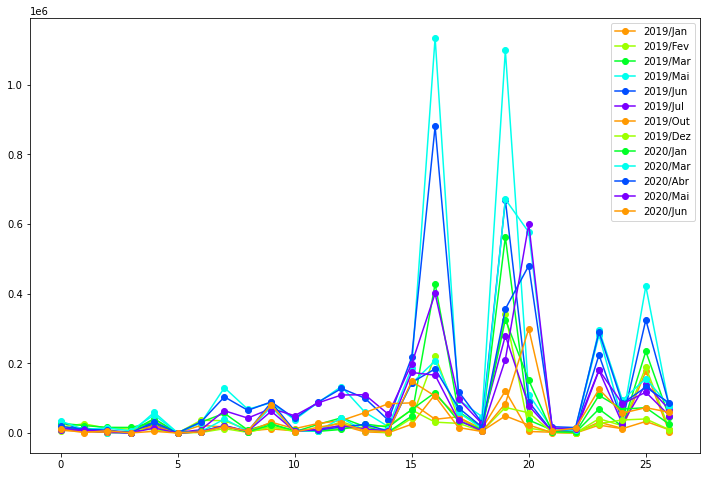

In [ ]:
#Gráfico de gastos (y) por Estados (x) por mês (linhas), ao longo de dois anos

usaveis_dengue.plot(figsize=(12,8), marker='o')

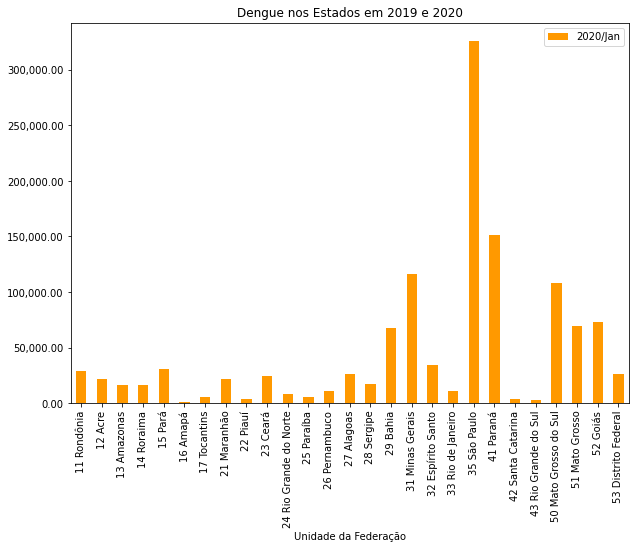

In [ ]:
#Gráfico de gastos (y) por Estados (x) por mês (linhas) em Janeiro de 2020

ax = usaveis_dengue.plot(x="Unidade da Federação", y="2020/Jan", kind="bar", figsize=(10,7))  #"ax" é o "axis", ou seja, o controle dos eixos.
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #procurar na documentação do matplotlib sobre o "tickformatter".

plt.title("Dengue nos Estados em 2019 e 2020")
plt.show() 

A partir desse ponto, pretendemos comparar os gastos gerais do SUS com os gastos específicos no combate à dengue, nos Estados, especificamente no ano de 2019.

##OBS: ainda pendente esta análise. Falta adequar o DataFrame para realizar as comparações e plotar o gráfico.

In [ ]:
#dados relativos aos gastos gerais do SUS.

usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,Norte,1858258110.78
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,Norte,841333511.62
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,Norte,3543304079.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2682746.28,2891100.20,2737677.78,2693726.29,26714

In [ ]:
#dados relativos aos gastos com a dengue.

usaveis_dengue.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
0,11 Rondônia,8393.64,6788.43,10316.46,8655.70,9969.01,32479.55,16153.93,9646.03,8142.14,8017.42,9546.53,17717.14,28416.83,34404.56,34899.54,19422.63,9102.91,10620.72,8769.82,3314.38,4490.35,3393.81,3022.18,7026.13
1,12 Acre,12641.03,10787.83,16354.11,2390.08,7270.85,6005.50,6376.32,2783.38,3775.97,5273.46,15112.99,26757.58,21790.82,28349.74,10571.13,11312.51,8372.68,1712.81,3075.87,-,2449.29,1800.07,5992.51,13048.09
2,13 Amazonas,1924.05,1726.56,2523.00,3723.16,1638.68,4078.88,2014.25,950.23,295.76,2135.73,3951.70,13873.25,16529.24,17295.44,15005.81,8832.56,5147.50,7010.77,4952.06,6543.99,3474.87,4218.98,6734.44,11178.14
3,14 Roraima,668.26,1235.55,4898.67,2923.65,726.04,896.69,1086.99,1926.07,1704.05,5987.91,12931.41,11582.33,16358.58,7578.64,6659.06,1633.15,287.76,550.05,-,825.55,-,-,-,-
4,15 Pará,25698.98,38919.08,41564.76,53180.08,59702.15,28144.35,20101.74,32544.16,16650.56,19733.37,20430.81,10163.67,30454.34,45490.85,52312.96,32160.17,14866.71,5148.69,10681.33,5412.31,3849.57,2119.09,2949.60,5172.84


In [ ]:
usaveis_dengue.info() #ainda pendente as adequações para que seja possível plotar o gráfico transposto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2019/Jan              27 non-null     float64
 2   2019/Fev              27 non-null     float64
 3   2019/Mar              27 non-null     float64
 4   2019/Abr              27 non-null     object 
 5   2019/Mai              27 non-null     float64
 6   2019/Jun              27 non-null     float64
 7   2019/Jul              27 non-null     float64
 8   2019/Ago              27 non-null     object 
 9   2019/Set              27 non-null     object 
 10  2019/Out              27 non-null     float64
 11  2019/Nov              27 non-null     object 
 12  2019/Dez              27 non-null     float64
 13  2020/Jan              27 non-null     float64
 14  2020/Fev              27 non-null     object 
 15  2020/Mar              27 

#AULA 4

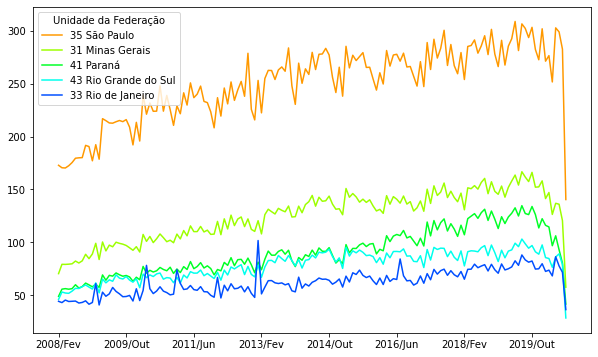

In [ ]:
#ajustando a coluna Y

ordenado_total = ordenado_total / 1000000
ordenado_total.head(5).T.plot(figsize=(10,6))

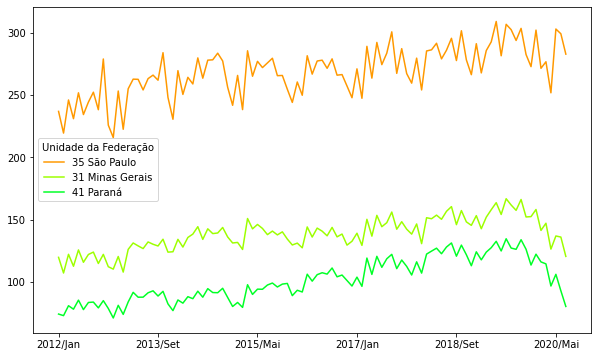

In [ ]:
#vamos pegar somente as linhas a partir da linha 47, que é janeiro de 2012

meses_filtrados = ordenado_total.columns[47:150]
ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))

(0.0, 350.0)

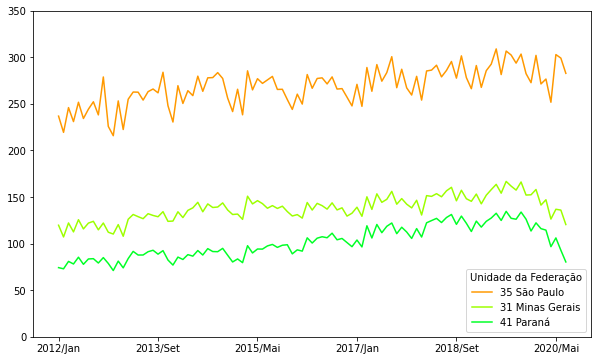

In [ ]:
#mesmo gráfico acima, mas alterando os valores exibidos no eixo Y (essa é a visão mais justa)

ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(100.0, 350.0)

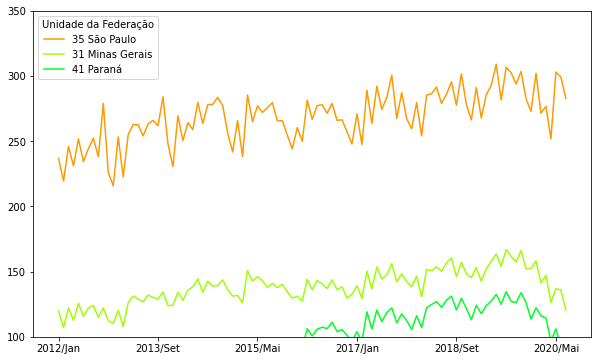

In [ ]:
#mesmo gráfico acima, mas alterando os valores exibidos no eixo Y

ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(100, 350)

#A ESCOLHA DO EIXO É MUITO IMPORTANTE PARA UMA ANÁLISE CORRETA, EVITANDO ASSIM "ILUSÕES"

(0.0, 350.0)

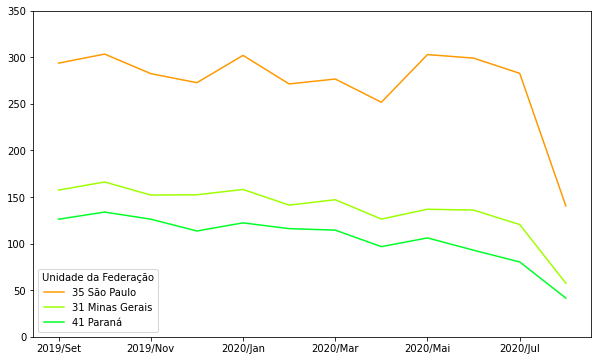

In [ ]:
#cuidar com o eixo X também, principalmente na área financeira

ordenado_total[ordenado_total.columns[-12:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#dá a impressão que os gastos estão caindo, porém...

(0.0, 350.0)

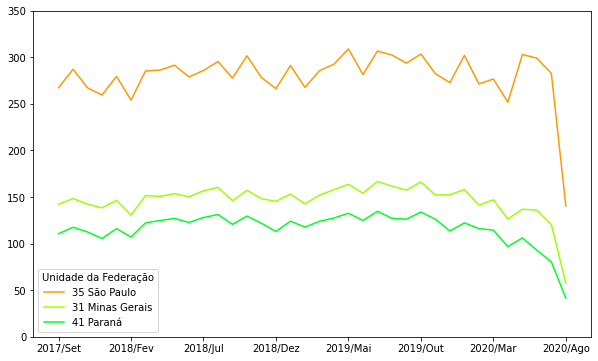

In [ ]:
#se mudamos os parâmetros (últimos 36 meses)...

ordenado_total[ordenado_total.columns[-36:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#... pode dar a impressão de que os custos estão estáveis ou subindo.
#com 60 meses ou mais já verifica-se a subida dos gastos.

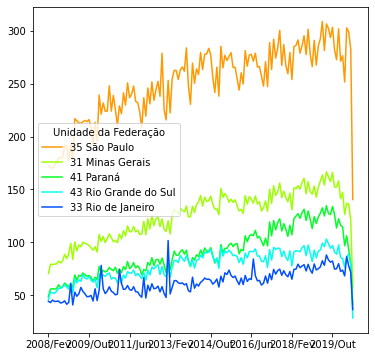

In [ ]:
#teste de alteração de escala (sensação de crescimento maior)

ordenado_total.head(5).T.plot(figsize=(6,6))

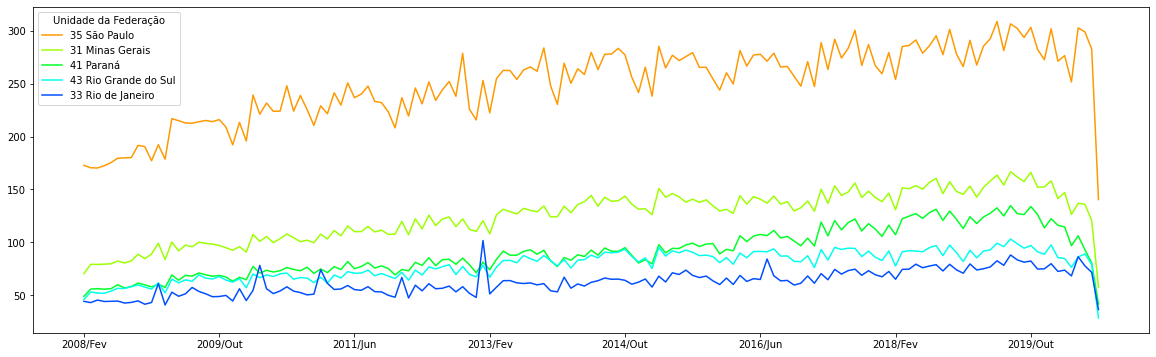

In [ ]:
#teste de alteração de escala (sensação de crescimento menor)

ordenado_total.head(5).T.plot(figsize=(20,6))

#AULA 5

In [ ]:
#Selecionando a última coluna

mes_mais_recente = ordenado_total.columns[-1]
mes_mais_recente

'2020/Ago'

In [ ]:
gastos_do_mais_recente = ordenado_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           140.41
31 Minas Gerais         57.47
41 Paraná               41.54
43 Rio Grande do Sul    28.35
33 Rio de Janeiro       36.26
Name: 2020/Ago, dtype: float64

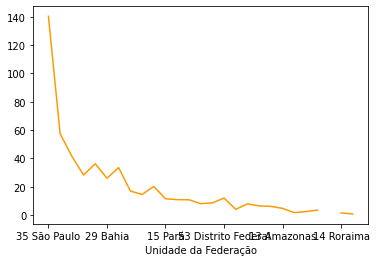

In [ ]:
gastos_do_mais_recente.plot()

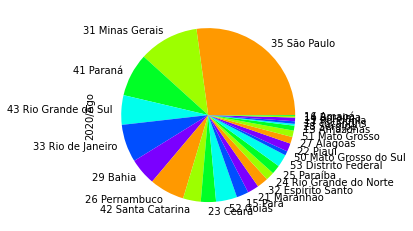

In [ ]:
gastos_do_mais_recente.plot(kind="pie")

Horrores da pizza:

- legenda horrível;
- número de fatias increditável;

Já estamos com uma vantagem que é:

- o gráfico veio ordenado;

In [ ]:
#ordem aleatória

gastos_do_mais_recente.sample(frac=1)

Unidade da Federação
28 Sergipe                 1.74
27 Alagoas                 6.49
50 Mato Grosso do Sul      4.06
51 Mato Grosso             6.17
42 Santa Catarina         16.99
14 Roraima                 1.52
22 Piauí                   7.93
25 Paraíba                 8.59
41 Paraná                 41.54
43 Rio Grande do Sul      28.35
21 Maranhão               10.92
26 Pernambuco             33.54
52 Goiás                  20.24
17 Tocantins               2.45
29 Bahia                  26.02
23 Ceará                  14.56
33 Rio de Janeiro         36.26
11 Rondônia                3.56
53 Distrito Federal       12.04
35 São Paulo             140.41
31 Minas Gerais           57.47
24 Rio Grande do Norte     8.08
12 Acre                     nan
15 Pará                   11.56
16 Amapá                   0.83
32 Espírito Santo         10.82
13 Amazonas                4.73
Name: 2020/Ago, dtype: float64

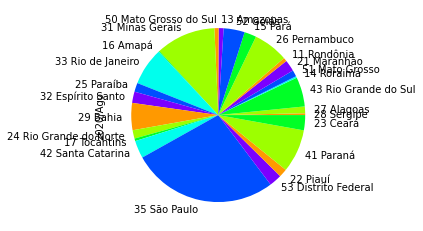

In [ ]:
#pizza não ordenada

gastos_do_mais_recente.sample(frac=1).plot(kind="pie")

Horrores da pizza:

- legenda horrível;
- número de fatias increditável;
- não dá pra saber a ordem;
- cores repetidas;
- muito ruim para definir ordem;
- péssimo para comparar;

In [ ]:
#visualização simples para ver o valor absoluto

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             140.41
31 Minas Gerais           57.47
41 Paraná                 41.54
43 Rio Grande do Sul      28.35
33 Rio de Janeiro         36.26
29 Bahia                  26.02
26 Pernambuco             33.54
42 Santa Catarina         16.99
23 Ceará                  14.56
52 Goiás                  20.24
15 Pará                   11.56
21 Maranhão               10.92
32 Espírito Santo         10.82
24 Rio Grande do Norte     8.08
25 Paraíba                 8.59
53 Distrito Federal       12.04
50 Mato Grosso do Sul      4.06
22 Piauí                   7.93
27 Alagoas                 6.49
51 Mato Grosso             6.17
13 Amazonas                4.73
28 Sergipe                 1.74
17 Tocantins               2.45
11 Rondônia                3.56
12 Acre                     nan
14 Roraima                 1.52
16 Amapá                   0.83
Name: 2020/Ago, dtype: float64

In [ ]:
#fazendo comparação (essa tabela é melhor para fazer a comparação do que o gráfico de pizza)

gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]  #usando o LOC chamamos a linha. Sem o LOC estaríamos chamando a coluna inteira.

#Exemplo: olhando a lista abaixo verificamos que o RS gastou 10% a mais do que o RJ.

Unidade da Federação
35 São Paulo             3.87
31 Minas Gerais          1.58
41 Paraná                1.15
43 Rio Grande do Sul     0.78
33 Rio de Janeiro        1.00
29 Bahia                 0.72
26 Pernambuco            0.93
42 Santa Catarina        0.47
23 Ceará                 0.40
52 Goiás                 0.56
15 Pará                  0.32
21 Maranhão              0.30
32 Espírito Santo        0.30
24 Rio Grande do Norte   0.22
25 Paraíba               0.24
53 Distrito Federal      0.33
50 Mato Grosso do Sul    0.11
22 Piauí                 0.22
27 Alagoas               0.18
51 Mato Grosso           0.17
13 Amazonas              0.13
28 Sergipe               0.05
17 Tocantins             0.07
11 Rondônia              0.10
12 Acre                   nan
14 Roraima               0.04
16 Amapá                 0.02
Name: 2020/Ago, dtype: float64

Desafio: criar a tabela de comparação com o seu Estado

In [ ]:
#resposta do desafio acima.

gastos_do_mais_recente / gastos_do_mais_recente.loc["43 Rio Grande do Sul"]

Unidade da Federação
35 São Paulo             4.95
31 Minas Gerais          2.03
41 Paraná                1.47
43 Rio Grande do Sul     1.00
33 Rio de Janeiro        1.28
29 Bahia                 0.92
26 Pernambuco            1.18
42 Santa Catarina        0.60
23 Ceará                 0.51
52 Goiás                 0.71
15 Pará                  0.41
21 Maranhão              0.39
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.29
25 Paraíba               0.30
53 Distrito Federal      0.42
50 Mato Grosso do Sul    0.14
22 Piauí                 0.28
27 Alagoas               0.23
51 Mato Grosso           0.22
13 Amazonas              0.17
28 Sergipe               0.06
17 Tocantins             0.09
11 Rondônia              0.13
12 Acre                   nan
14 Roraima               0.05
16 Amapá                 0.03
Name: 2020/Ago, dtype: float64

In [ ]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]).head(5)

Unidade da Federação
35 São Paulo           3.87
31 Minas Gerais        1.58
41 Paraná              1.15
43 Rio Grande do Sul   0.78
33 Rio de Janeiro      1.00
Name: 2020/Ago, dtype: float64

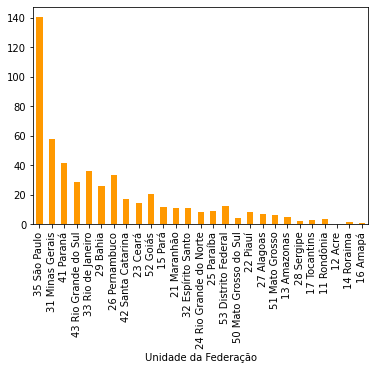

In [ ]:
gastos_do_mais_recente.plot(kind="bar")

Desafio: documentação do matplotlib e pandas para colocar grid no gráfico

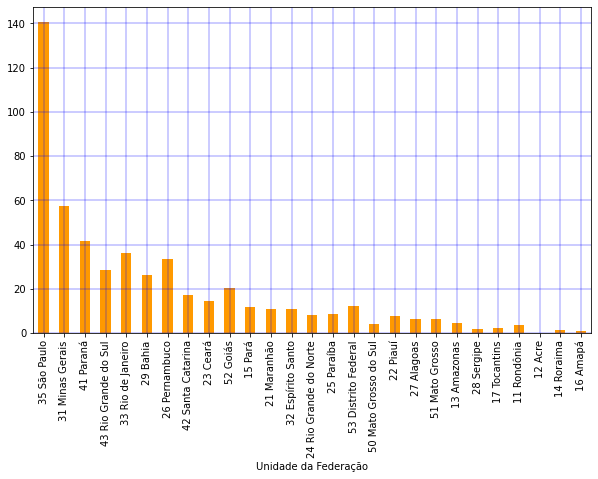

In [ ]:
#Respondendo o desafio acima (inclusão do grid).

gastos_do_mais_recente.plot(kind="bar", figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.4)

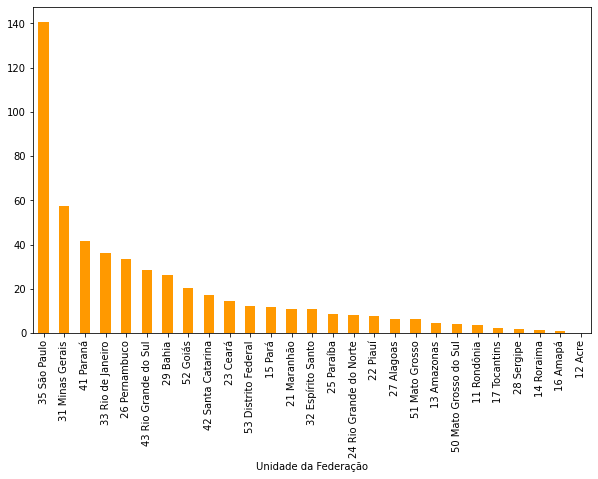

In [ ]:
#ordenando do maior para o menor gasto

gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind="bar", figsize=(10,6))

Desafio: fazer um gráfico de barra e uma tabela do gasto dos outros Estados em função do seu Estado.

Desafio: fazendo o comparativo de um Estado para o outro, fazer também a comparação em relação a população. Escolha gráficos de barra.

Desafio: tirar as conclusões dos gráficos e compartilhar no Discord (levantar hipóteses e perguntas).

SUPER DESAFIO: escolha ouro valor, fora valor aprovado, no TABNET e explore.

In [ ]:
#Para resolver o desafio abaixo, optamos por selecionar os dados MENOS recentes.

mes_menos_recente = ordenado_total.columns[0]
mes_menos_recente

'2008/Fev'

In [ ]:
gastos_do_menos_recente = ordenado_total[mes_menos_recente]
gastos_do_menos_recente.head()

Unidade da Federação
35 São Paulo           172.83
31 Minas Gerais         70.30
41 Paraná               48.86
43 Rio Grande do Sul    45.90
33 Rio de Janeiro       44.12
Name: 2008/Fev, dtype: float64

In [ ]:
#Fazendo a comparação com o meu Estado

(gastos_do_menos_recente / gastos_do_menos_recente.loc["43 Rio Grande do Sul"]).head(5)

Unidade da Federação
35 São Paulo           3.77
31 Minas Gerais        1.53
41 Paraná              1.06
43 Rio Grande do Sul   1.00
33 Rio de Janeiro      0.96
Name: 2008/Fev, dtype: float64

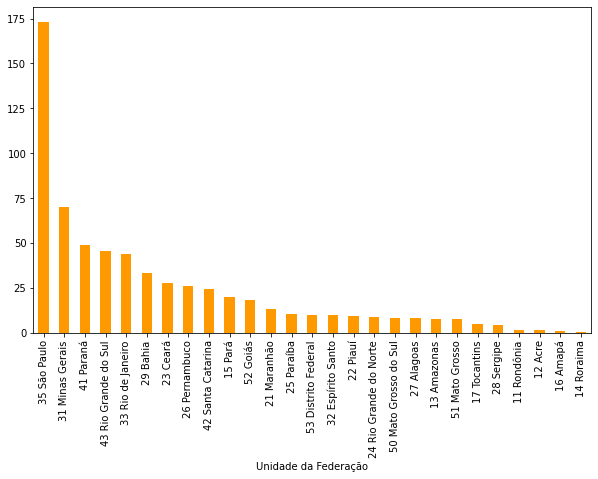

In [ ]:
#Plotando o gráfico e ordenando do maior para o menor gasto

gastos_do_menos_recente = gastos_do_menos_recente.sort_values(ascending=False)
gastos_do_menos_recente.plot(kind="bar", figsize=(10,6))

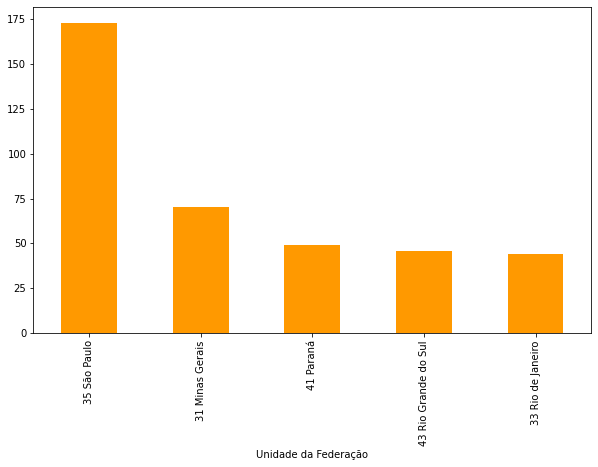

In [ ]:
#Plotando o gráfico dos cinco primeiros

gastos_do_menos_recente = gastos_do_menos_recente.sort_values(ascending=False)
gastos_do_menos_recente.head().plot(kind="bar", figsize=(10,6))

In [ ]:
#agora vamos fazer o comparativo entre três Estados, utilizando regiões diferentes e comparando com a população.

comparando_estados = ordenado_total.T
comparando_estados[["41 Paraná", "35 São Paulo", "29 Bahia"]].head()


Unidade da Federação,41 Paraná,35 São Paulo,29 Bahia
2008/Fev,48.86,172.83,33.41
2008/Mar,55.61,170.48,41.30
2008/Abr,56.12,170.28,42.83
2008/Mai,55.57,172.40,42.07
2008/Jun,56.09,175.42,39.91


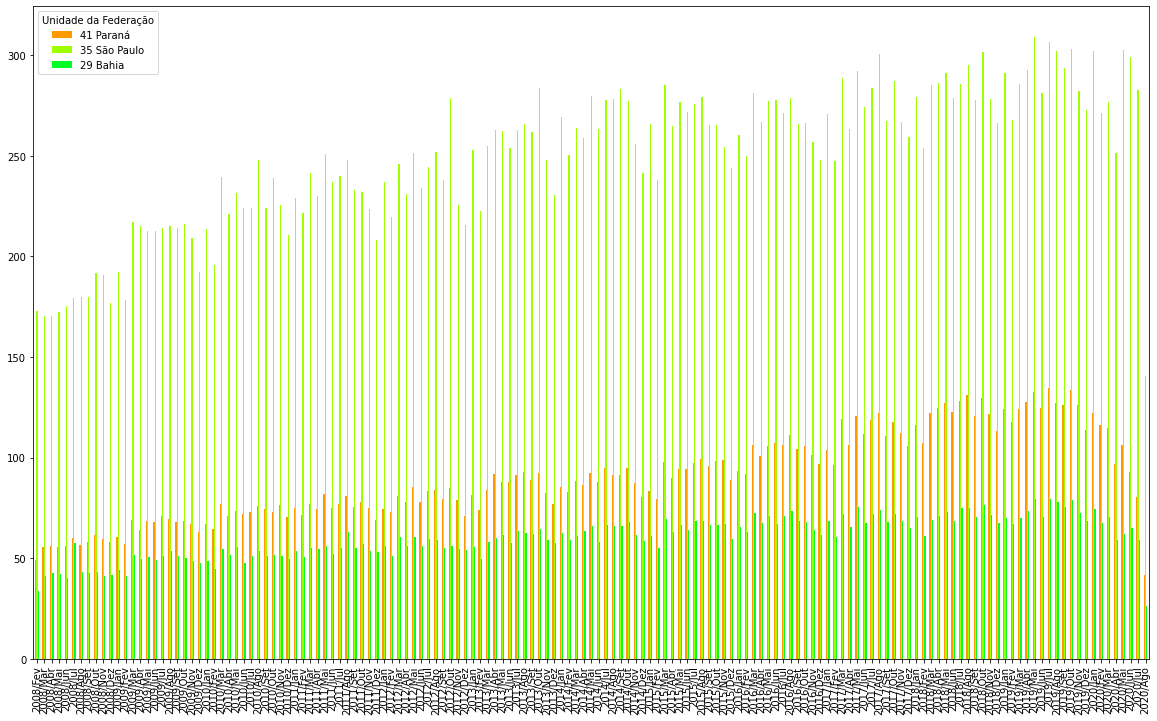

In [ ]:
comparando_estados[["41 Paraná", "35 São Paulo", "29 Bahia"]].plot(kind="bar", figsize=(20,12))

In [ ]:
comparando_estados[["41 Paraná", "35 São Paulo", "29 Bahia"]]

Unidade da Federação,41 Paraná,35 São Paulo,29 Bahia
2008/Fev,48.86,172.83,33.41
2008/Mar,55.61,170.48,41.30
2008/Abr,56.12,170.28,42.83
2008/Mai,55.57,172.40,42.07
2008/Jun,56.09,175.42,39.91
...,...,...,...
2020/Abr,96.73,251.70,59.11
2020/Mai,106.10,302.86,61.76
2020/Jun,92.90,299.06,65.16
2020/Jul,80.32,282.71,58.90


O arquivo foi "baixado" do site [https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html) no formato XLSX e será colocado no repositório do GitHub. Nele podemos encontrar dados populacionais por Ano e por UF do Brasil.

In [266]:
ibge = pd.read_excel("/content/Tabela 6579.xlsx", skiprows= 3, skipfooter=1, thousands=".")

#mostra as primeiras 5 linhas
ibge.head()

,Unnamed: 0,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
1,2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2,2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
3,2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
4,2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


In [267]:
#Renomeando a coluna Ano e deixando o ano como index

ibge.rename(columns={"Unnamed: 0":"Ano"}, inplace=True)
ibge.set_index("Ano",inplace=True)
ibge.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


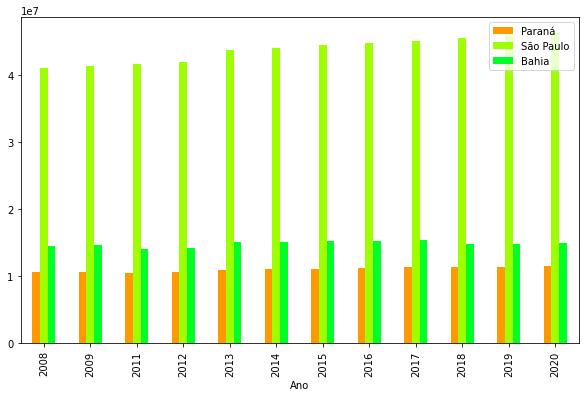

In [268]:
#plotando o gráfico da população dos três Estados selecionados anteriormente

ibge[["Paraná", "São Paulo", "Bahia"]].plot(kind="bar", figsize=(10,6))

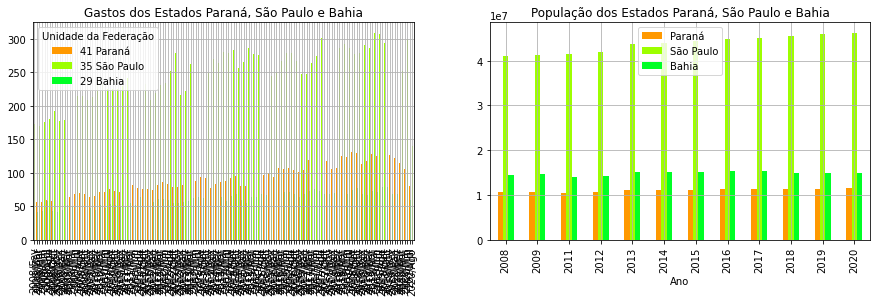

In [269]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

comparando_estados[["41 Paraná", "35 São Paulo", "29 Bahia"]].plot(kind='bar', grid=True, ax=axes[0],
                title="Gastos dos Estados Paraná, São Paulo e Bahia")

ibge[["Paraná", "São Paulo", "Bahia"]].plot(kind='bar', grid=True, ax=axes[1],
                title="População dos Estados Paraná, São Paulo e Bahia")

Nos dois gráficos acima é possível comparar e confirmar como os gastos são condizentes com a população de cada Estado analisado. O Estado mais populoso, São Paulo, é o que possui maior quantidade de gastos. O segundo Estado mais populoso, a Bahia, possui o segundo maior gasto. E o Paraná, o menos populoso dos três Estados analiados, é o que possui o menor valor gasto.

##OBS: ficou pendente arrumar os gráficos, principalmente o primeiro (da esquerda), onde ainda não foram agrupados os meses em apenas um ano (tal como no gráfico populacional, à direita), gerando assim muito "ruído" no gráfico e dificuldade de visualização.